In [1]:
from script import main_func
import cooler
import matplotlib.pyplot as plt
#import hdbscan
from sklearn.cluster import DBSCAN, OPTICS
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

In [2]:
warnings.simplefilter(action='ignore')

In [3]:
path = '../../5AB.filtered.mcool'

In [4]:
position = 'chr2:6400000-6800000'

In [5]:
coords = main_func(path, 2000, position, end_bin=35, quantile_threshold=0.98, fdr_correction=0.05, qval_threshold=0.1)

### DBSCAN

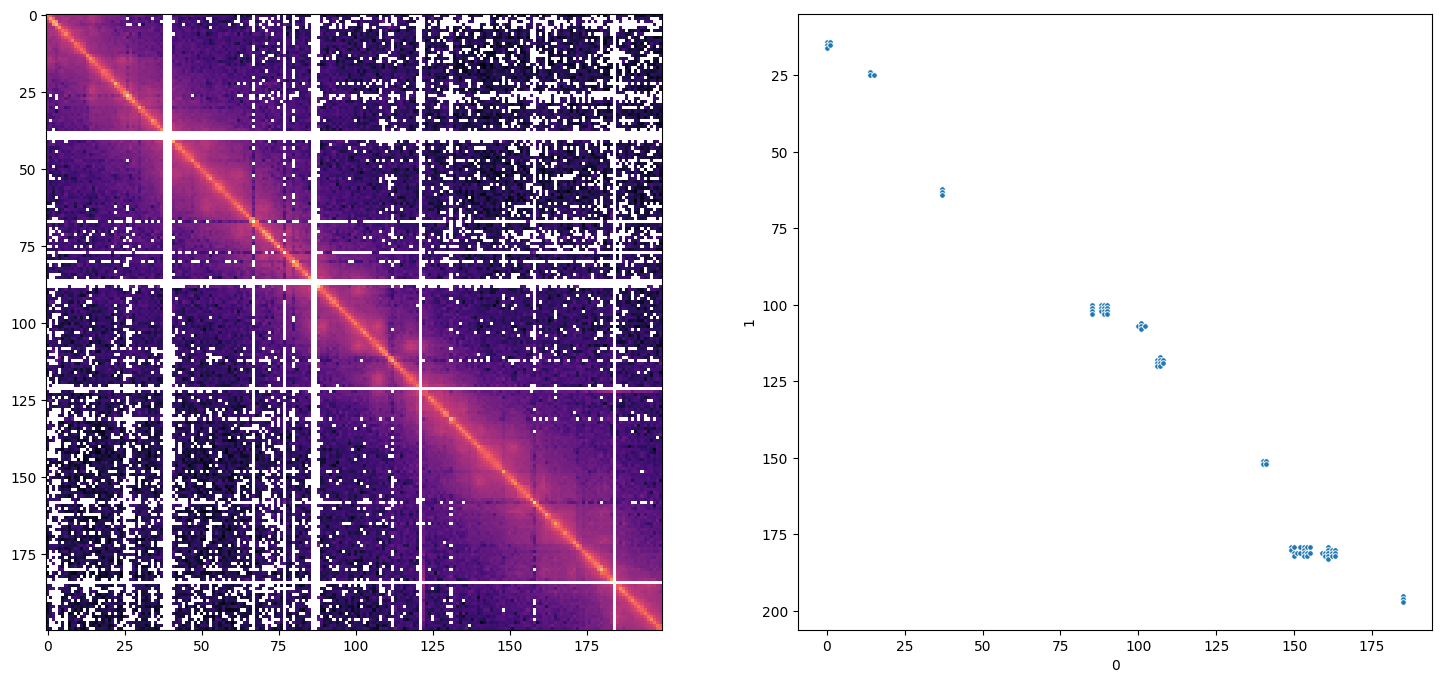

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

coor = coords.iloc[:, :2]
clusterer = DBSCAN(eps=1, min_samples=3)
cluster_labels_all_db = clusterer.fit_predict(coor)
coor['dbscan'] = cluster_labels_all_db
coor_new = coor.query('dbscan != -1')

scatter = sns.scatterplot(x=coor_new.iloc[:, 0],
                    y=coor_new.iloc[:, 1],
                    palette="colorblind", marker='.', s=65, ax=axes[1])
ax = scatter.axes
ax.invert_yaxis()


mtx_name_for_cooler = path + '::/resolutions/' + str(2000)
hic = cooler.Cooler(mtx_name_for_cooler).matrix(balance=True, sparse=False).fetch(position)
axes[0].imshow(np.log(hic), cmap='magma')
None

### OPTICS

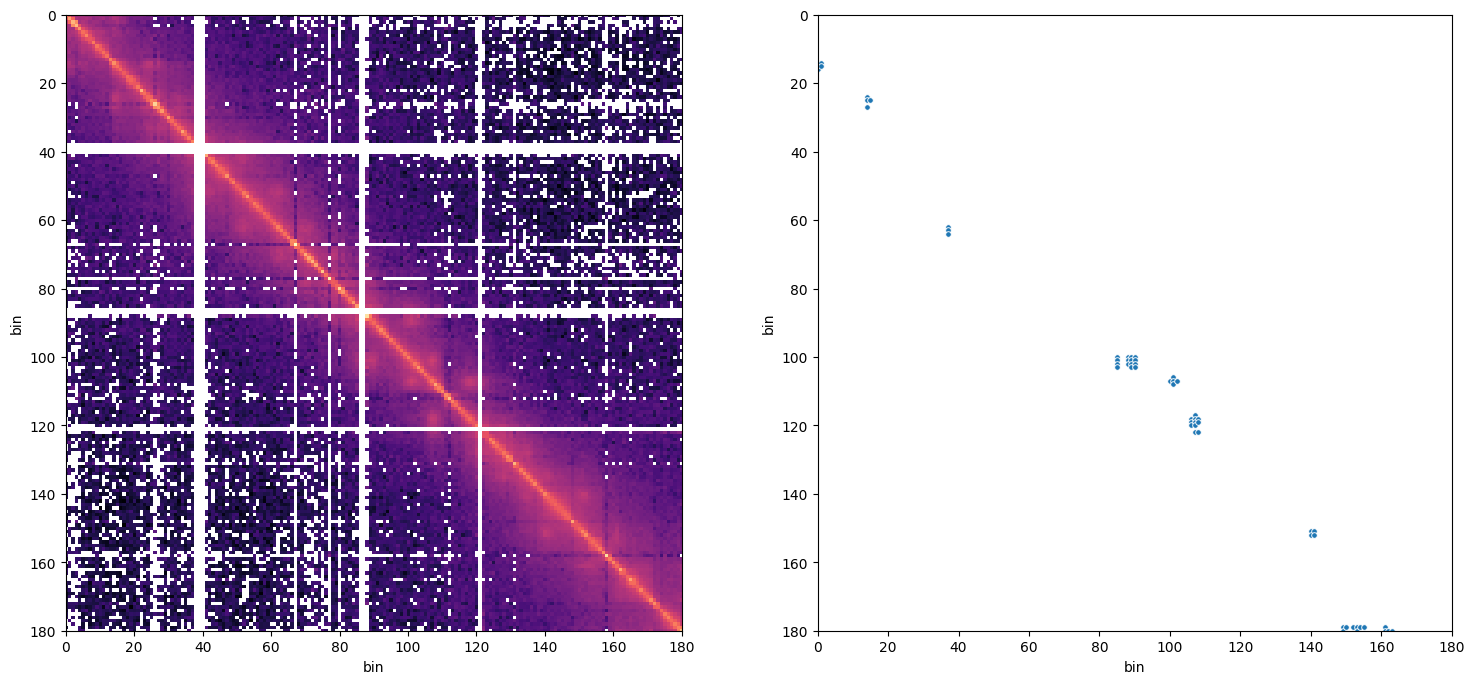

<Figure size 1000x1000 with 0 Axes>

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

coor = coords.iloc[:, :2]
plt.figure(figsize=(10, 10))
optics = OPTICS(min_samples=3, max_eps=2)
optics_pred = optics.fit_predict(coor)
coor['optics'] = optics_pred
coor_optics = coor.query('optics != -1')
scatter = sns.scatterplot(x=coor_optics.iloc[:, 0],
                    y=coor_optics.iloc[:, 1],
                    palette="colorblind", marker='.', s=65, ax=axes[1])
ax = scatter.axes
ax.set_xlim([0, 180])
ax.set_ylim([0, 180])
ax.invert_yaxis()
ax.set_xlabel('bin')
ax.set_ylabel('bin')

mtx_name_for_cooler = path + '::/resolutions/' + str(2000)
hic = cooler.Cooler(mtx_name_for_cooler).matrix(balance=True, sparse=False).fetch(position)
axes[0].imshow(np.log(hic), cmap='magma')
axes[0].set_xlim([0, 180])
axes[0].set_ylim([180, 0])
axes[0].set_xlabel('bin')
axes[0].set_ylabel('bin')

None